# Look at bathymetry made using nemo_python

Github: https://github.com/knaughten/nemo_python/

In [1]:
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import cmocean
import pickle

#### Functions

In [2]:
def prepare_plot(figsize=(15, 15), dpi=300):
    """This function returns prepared axes for the polar plot.
    
    Usage:
        fig, ax = prepare_plot()
    """
    fig = plt.figure(figsize=figsize)
    ax = plt.axes(projection=ccrs.SouthPolarStereo())
    ax.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
    ax.set_boundary(map_circle, transform=ax.transAxes)
    # ax.coastlines(); 
    gl = ax.gridlines(draw_labels=True, ylocs=[]);#, color='w', lw=2);
    return fig, ax

In [4]:
theta = np.linspace(0, 2*np.pi, 100)
map_circle = mpath.Path(np.vstack([np.sin(theta), np.cos(theta)]).T * 0.5 + [0.5, 0.5])

In [5]:
TERRA = '/gws/nopw/j04/terrafirma/birgal/NEMO_AIS/'

### Visualize domain_cfg file (output from NEMO DOMAINcfg tool)

In [6]:
# domain = xr.open_dataset(f'{TERRA}bathymetry/domain_cfg.nc')
domain_new = xr.open_dataset(f'{TERRA}bathymetry/domain_cfg-20231025.nc')
domain_old = xr.open_dataset(f'/home/users/birgal/probably-delete/domain_cfg.nc')

domain_diff   = domain_new.isel(time_counter=0, y=slice(0,439)).bathy_metry - domain_old.isel(time_counter=0).bathy_metry
isfdraft_diff = domain_new.isel(time_counter=0, y=slice(0,439)).isf_draft - domain_old.isel(time_counter=0).isf_draft

In [9]:
import cartopy.feature as cfeature

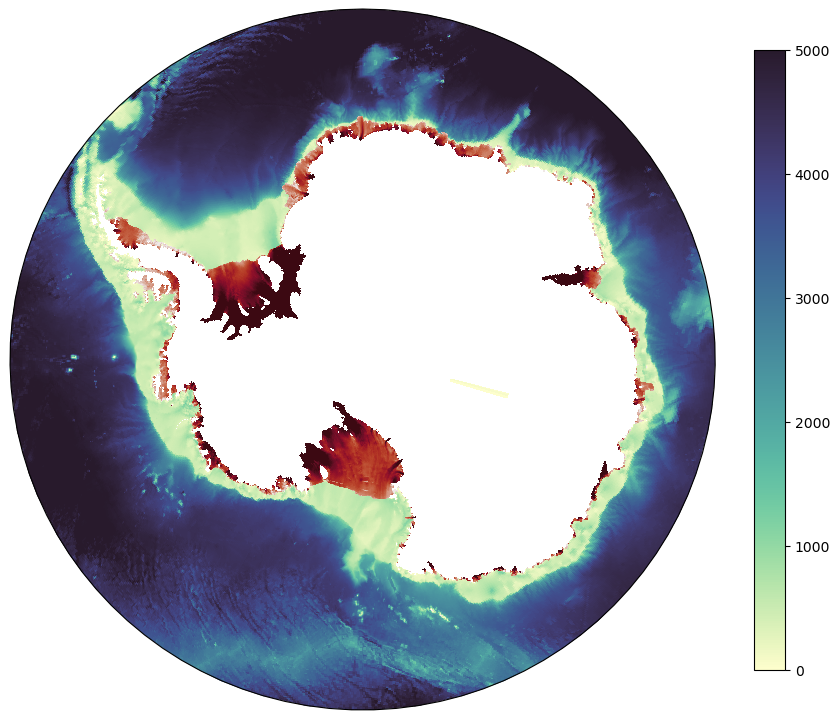

In [23]:
fig, ax = plt.subplots(1,1, figsize=(10,10), subplot_kw={'projection': ccrs.SouthPolarStereo()})

ax.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())
ax.set_boundary(map_circle, transform=ax.transAxes)

# Separated bathymetries:
kwags1={'transform':ccrs.PlateCarree(), 'vmin':-500, 'vmax':500, 'cmap':cmocean.cm.balance, 'rasterized':True}
kwags2={'transform':ccrs.PlateCarree(), 'vmin':0, 'vmax':5000, 'cmap':cmocean.cm.deep, 'rasterized':True}
plot_isf   = np.ma.masked_where(domain_new.isel(time_counter=0).isf_draft<=0, domain_new.isel(time_counter=0).isf_draft)
plot_bathy = np.ma.masked_where(domain_new.isel(time_counter=0).bathy_metry <= 0.5, domain_new.isel(time_counter=0).bathy_metry)
cm1 = ax.pcolormesh(domain_new.isel(time_counter=0).nav_lon, domain_new.isel(time_counter=0).nav_lat,
                    plot_bathy, **kwags2);
cm2 = ax.pcolormesh(domain_new.isel(time_counter=0).nav_lon, domain_new.isel(time_counter=0).nav_lat,
                    plot_isf, **kwags1);


CB = fig.colorbar(cm1, ax=ax, fraction=0.04)
fig.set_facecolor('white')
# ax.add_feature(cfeature.LAND, color='w', zorder=3)
# fig.savefig('/gws/nopw/j04/terrafirma/birgal/NEMO_AIS/bathymetry/domain_icedraft_diff_zoom.pdf')
# fig.savefig('/gws/nopw/j04/terrafirma/birgal/NEMO_AIS/bathymetry/domain_icedraft_diff.jpg')

In [21]:
fig, ax = plt.subplots(1,1, figsize=(25,25), subplot_kw={'projection': ccrs.SouthPolarStereo()}, dpi=400)

ax.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
ax.set_boundary(map_circle, transform=ax.transAxes)
gl = ax.gridlines(draw_labels=True, ylocs=[]);

ax.set_title('New iceshelf draft minus old')

# Separated bathymetries:
kwags={'transform':ccrs.PlateCarree(), 'vmin':-210, 'vmax':210, 'cmap':cmocean.cm.balance, 'rasterized':True}
cm1 = ax.pcolormesh(domain_new.isel(time_counter=0, y=slice(0,439)).nav_lon, domain_new.isel(time_counter=0, y=slice(0,439)).nav_lat,
                    isfdraft_diff, **kwags);

CB = fig.colorbar(cm1, ax=ax, fraction=0.04)
fig.set_facecolor('white')

# fig.savefig('/gws/nopw/j04/terrafirma/birgal/NEMO_AIS/bathymetry/domain_icedraft_diff_zoom.pdf')
fig.savefig('/gws/nopw/j04/terrafirma/birgal/NEMO_AIS/bathymetry/domain_icedraft_diff.jpg')